In [2]:
import librosa
from scipy.io import wavfile as wav
import numpy as np

filename = 'samples/audio/100852-0-0-0.wav'

librosa_audio, librosa_sample_rate = librosa.load(filename)
scipy_sample_rate, scipy_audio = wav.read(filename)

print('Original sample rate:', scipy_sample_rate)
print('Librosa sample rate', librosa_sample_rate)

Original sample rate: 44100
Librosa sample rate 22050


In [3]:
print('Original audio file min-max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min-max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min-max range: -23628 to 27507
Librosa audio file min-max range: -0.50266445 to 0.74983937


In [4]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

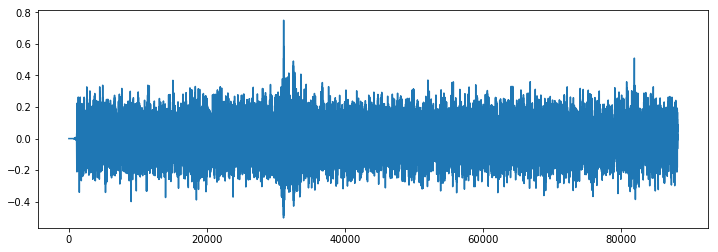

In [5]:
# librosa audio with channels merged
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio)

In [6]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 173)


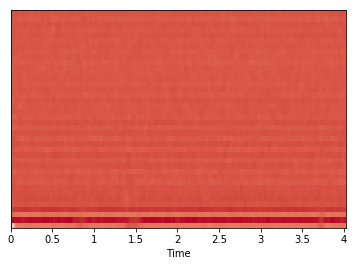

In [7]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

In [8]:
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T, axis=0)
    except Exception as e:
        print("Error encountered while parsing file:", file)
        return None
    
    return mfccsscaled

In [9]:
# Load various imports
import pandas as pd
import os
import librosa

# Set the path to the full dataset
fulldatasetpath = 'C:/dev/school/UrbanSound8K/audio/'

metadata = pd.read_csv('samples/metadata/UrbanSound8K.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class_name"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

Finished feature extraction from  8732  files


In [10]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features to numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

Using TensorFlow backend.


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [12]:
%store x_train 
%store x_test 
%store y_train 
%store y_test 
%store yy 
%store le

Stored 'x_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
Stored 'le' (LabelEncoder)
